# 一、描述统计分析

In [1]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('C:\\CJY\\test.csv')

In [7]:
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [8]:
#获取描述统计信息
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,13.926875,22.350750
std,3.540219,5.010218
min,8.630000,15.687000
25%,11.895250,18.716750
50%,13.627500,21.046000
75%,15.671250,24.536000
max,22.328000,35.255000


In [12]:
#样本平均值
con1_mean=data['Congruent'].mean()
con2_mean=data['Incongruent'].mean()
#样本标准差
con1_std=data['Congruent'].std()
con2_std=data['Incongruent'].std()

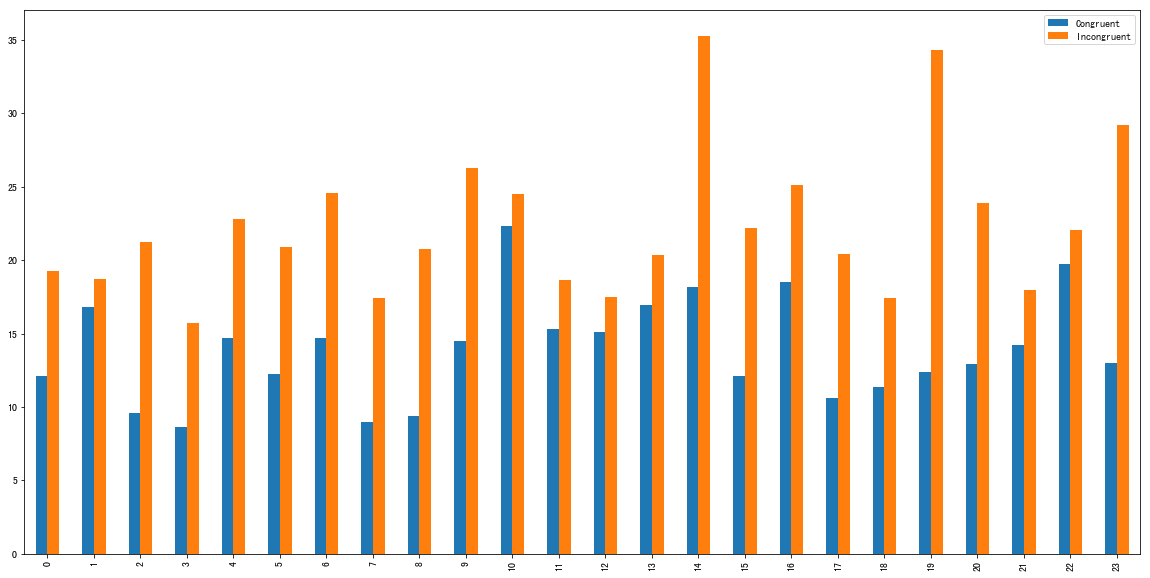

In [13]:
#两个样本数据集对比
fg=plt.figure(figsize=(20,10))
ax=fg.add_subplot(1,1,1)
data.plot(kind='bar',ax=ax)
plt.show()

In [14]:
print('描述统计分析结果：')
print('第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是:',con1_mean,'秒,标准差是',con1_std,'秒')
print('第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是:',con2_mean,'秒,标准差是',con2_std,'秒')
print('“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长')

描述统计分析结果：
第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是: 13.926875000000003 秒,标准差是 3.5402194271529703 秒
第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是: 22.35075 秒,标准差是 5.010217727196399 秒
“不一致”情况下所用时间均大于“一致”情况，也就是当字体内容和字体验证不一致时，实验者的平均反应时间变长


# 二、推论统计分析

## 1.问题是什么？

### 零假设和备选假设

零假设：人们的反应时间不会因为字体内容和字体颜色是否相同而有差异。

备选假设：特鲁普效应确实存在，在内容和颜色不同的情况下，人们的反应时间会不同。

### 检验类型

检验类型有很多种，因为使用数据是相关样本，所以选择相关配对检验。

In [15]:
#差值数据集
data['Difference']=data['Congruent']-data['Incongruent']
data.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


### 抽样分布类型

在案例中，样本数值小于30，属于小样本。那小样本是否满足t分布，我们通过作图来分析

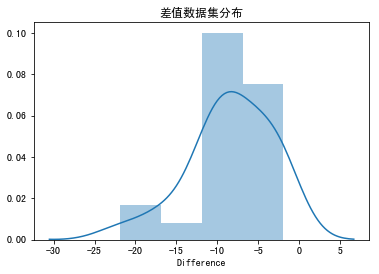

In [17]:
#导入绘图包
import seaborn as sns
#查看数据集分布
sns.distplot(data['Difference'])
plt.title('差值数据集分布')
plt.show()

通过观察上面的曲线，可以近似认为样本满足正态分布，所以满足t分布的使用条件。

### 检验方向

因为备选假设是特鲁普效应存在，所以我们使用单尾检验中的左尾检验，显著水平5%，t检验的自由度df=24

## 2.证据是什么

在零假设成立的前提下，等到样本平均值p的概率是多少？

In [25]:
#导入统计模块
from scipy import stats

t,p_twoTail=stats.ttest_rel(data['Congruent'],data['Incongruent'])
print('t值=',t,'双尾检验的p值=',p_twoTail)

t值= -8.08861087281 双尾检验的p值= 3.54871914972e-08


In [19]:
p_oneTail=p_twoTail/2
print('单尾检验的p值=',p_oneTail)

单尾检验的p值= 1.77435957486e-08


## 3.判断标准是什么？

In [21]:
#显著性水平使用alpha=5%
alpha=0.05

## 4.做出结论

In [22]:
#决策
if(t<0 and p_oneTail<alpha):
    print('拒绝零假设，有统计显著')
    print('也就是接受备选假设：特鲁普效应存在')
else :
    print('接受零假设，没有统计显著，特鲁普效应不存在')

拒绝零假设，有统计显著
也就是接受备选假设：特鲁普效应存在


假设检验报告：

相关配对检验t(24)=-8.09,p=1.77e-08(α=5%),左尾检验

统计上存在显著差异，拒绝零假设，从而验证特鲁普效应存在。

## 5.置信区间

In [23]:
t_ci=2.064
#差值数据平均值
sample_mean=data['Difference'].mean()
#差值数据标准误差
se=stats.sem(data['Difference'])
#置信区间
a=sample_mean+se*t_ci
b=sample_mean-se*t_ci

In [24]:
print('差值的置信区间，95的置信水平 CI=[%f,%f]' % (a,b))

差值的置信区间，95的置信水平 CI=[-6.274324,-10.573426]


## 6.效应量

In [27]:
#总体平均值就是零假设
pop_mean=0
#差值数据集的标准差
sample_std=data['Difference'].std()
d=(sample_mean-pop_mean)/sample_std

print('d=',d)

d= -1.6510807805255563


# 三、数据分析报告总结

1.描述统计分析

第一组数据：字体内容和字体颜色一致情况下，实验者的平均反应时间是: 13.92 秒,标准差是 3.54秒

第二组数据：字体内容和字体颜色不一致情况下，实验者的平均反应时间是: 22.35 秒,标准差是 5.01秒

当字体内容和和字体颜色不一致的情况下，实验者的平均反应时间边长

2.推论统计分析

1）假设检验

相关配对实验t(24)=-8.09,p=1.77e-08(α=5%),左尾检验

统计上存在显著差异，拒绝零假设，证明特鲁普效应存在。

2）置信区间

两个平均值差值的置信区间，95%的置信水平CI=[-6.27,-10.57]

3)效应量

d=-1.65